In [1]:
print("Akshat Jain")

Akshat Jain


# Step-1: Data Pre-processing
## 1. Importing the required libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd 
import numpy as np 
import seaborn as sns 

## 2. Load the Breast Cancer Wisconsin dataset

In [3]:
data = pd.read_csv("breastCancer.csv") 
data.head().T 

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [4]:
data.shape

(569, 32)

In [5]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## 3. Handling the missing values

In [6]:
print('Handling missing values in the dataset: ')
print(data.isnull().sum())

Handling missing values in the dataset: 
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## 4. Exploratory Data Analysis

<Axes: xlabel='diagnosis', ylabel='count'>

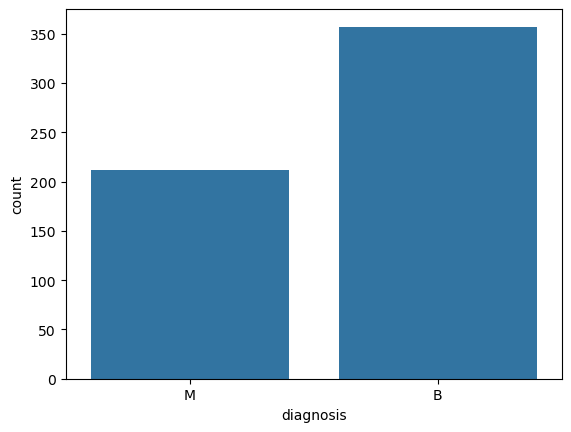

In [9]:
# Note: Corrected 'x='diagnosis, data data' from OCR
sns.countplot(x='diagnosis', data=data)

# Step-2: Adjusting additional variables

In [ ]:
# Note: Corrected '{'M':1, '8':0}' from OCR to 'B':0 based on context
data.replace({'M':1, 'B':0}, inplace=True)
data.head().T

,0,1,2,3,4
id,842302.000000,842517.000000,8.430090e+07,8.434830e+07,8.435840e+07
diagnosis,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
radius_mean,17.990000,20.570000,1.969000e+01,1.142000e+01,2.029000e+01
texture_mean,10.380000,17.770000,2.125000e+01,2.038000e+01,1.434000e+01
perimeter_mean,122.800000,132.900000,1.300000e+02,7.758000e+01,1.351000e+02
area_mean,1001.000000,1326.000000,1.203000e+03,3.861000e+02,1.297000e+03
smoothness_mean,0.118400,0.084740,1.096000e-01,1.425000e-01,1.003000e-01
compactness_mean,0.277600,0.078640,1.599000e-01,2.839000e-01,1.328000e-01
concavity_mean,0.300100,0.086900,1.974000e-01,2.414000e-01,1.980000e-01
concave points_mean,0.147100,0.070170,1.279000e-01,1.052000e-01,1.043000e-01


# Step-3: Extracting independent and dependent variables

In [12]:
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

# Step-4: Splitting the dataset into Training and Testing dataset

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Step-5: Fitting Support Vector to the Training set

In [16]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

# Step-6: Predicting the Test Result

In [18]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

# Step-7: Test accuracy of the result

In [19]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.99      0.94        67\n           1       0.98      0.85      0.91        47\n\n    accuracy                           0.93       114\n   macro avg       0.94      0.92      0.93       114\nweighted avg       0.93      0.93      0.93       114\n'

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  1],
       [ 7, 40]])

# Step-8: Finding the Accuracy of the model

In [21]:
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy * 100, "%") 

Accuracy: 92.98245614035088 %


# Hence, the accuracy of the model is approximate 93%.